In [24]:
from pathlib import Path
from IPython import get_ipython
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [25]:
# Specify paths to data directory and output directory

# 1. Path relative to this notebook file (../data):
DATA_DIR = Path(get_ipython().getoutput('pwd')[0]).parent / 'data'
# 2. For .py file:
# DATA_DIR = Path(__file__).resolve().parent / "data"
# 3. For specific directory you have somewhere:
# DATA_DIR = 'C:/Users/.../data'

# 1. Path relative to this notebook file (../output):
OUTPUT_DIR = DATA_DIR.parent / 'output'
# 2. For .py file:
# OUTPUT_DIR = Path(__file__).resolve().parent / "output"
# 3. For specific directory you have somewhere:
# OUTPUT_DIR = 'C:/Users/.../output'

In [26]:
# Read in dataframes

data = pd.read_csv(DATA_DIR / 'all'/ 'all_phases_counts.tsv', sep='\t', index_col=0)
labels = pd.read_csv(DATA_DIR / 'all'/ 'all_phases_coldata.tsv', sep='\t', index_col=0)

/home/bean/miniconda3/envs/tissue-model-analysis/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


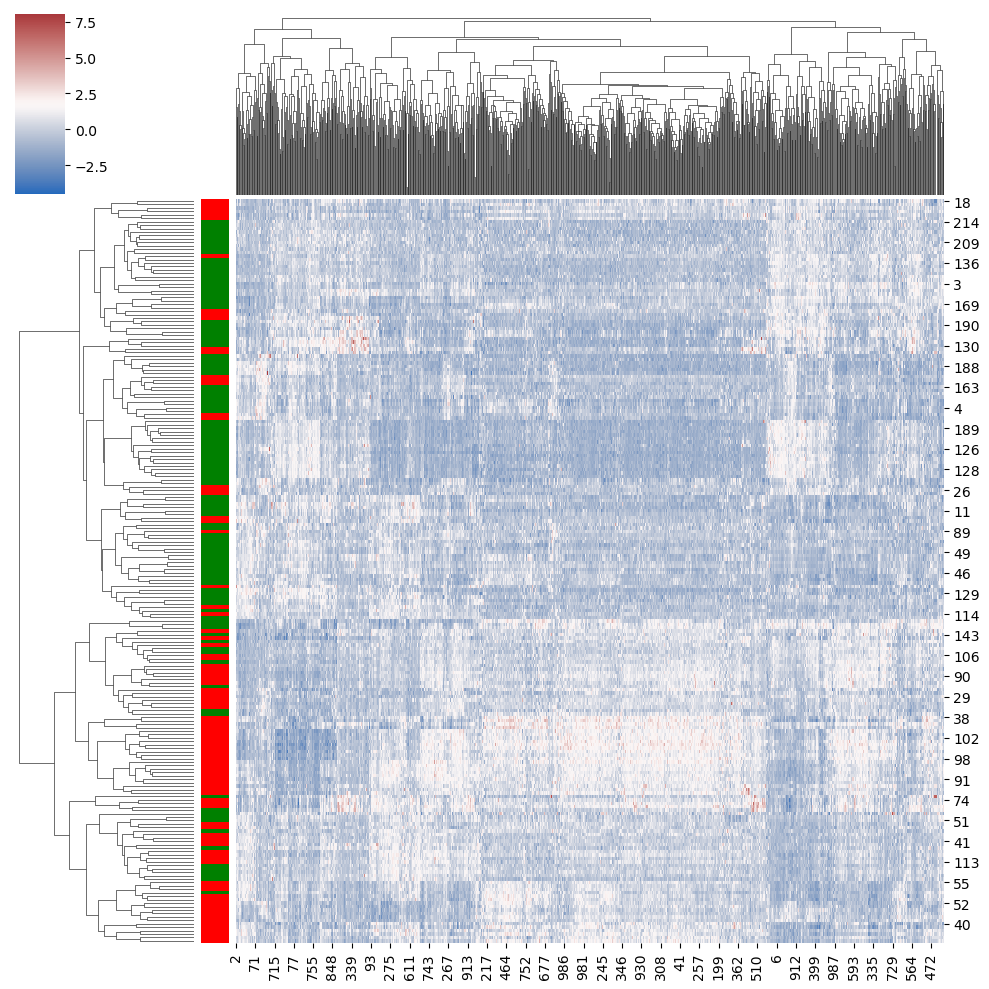

In [27]:
# Scale data and compute clustermap with hierarchical clustering

data_scaled = StandardScaler().fit_transform(data.transpose())

condition_to_color = {
    'healthy': 'green',
    'endometriosis': 'red',
}

row_colors = labels['condition'].map(condition_to_color).to_numpy()

g = sns.clustermap(
    data_scaled,
    row_colors=row_colors,  # Colored sidebar
    method='complete',      # Linkage
    cmap='vlag',            # Color palette
    figsize=(10, 10),       # Figure size
)

plt.show()

# Save figure to output directory
# Create output directory if it does not exist
os.makedirs(OUTPUT_DIR, exist_ok=True)
output_file_path = OUTPUT_DIR / 'clustermap.png'
g.savefig(output_file_path, dpi=500)